In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
import numpy as np
from numpy import argmax
import glob
import re

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve

In [ ]:
#df = pd.read_csv('Z:\\Tami - summaries\\df_prg.csv')
df = pd.read_csv('Z:\\Tami - summaries\\df_prg_4m.csv')

In [ ]:
df = pd.read_csv('Z:\\Tami - summaries\\6m_FA_matched2.csv')

In [ ]:
df.cohort.value_counts()

0    11823
1      563
Name: cohort, dtype: int64

In [ ]:
Season_dum = pd.get_dummies(df['birth_season'])
df = pd.concat([df, Season_dum], axis=1, join='inner')

In [ ]:
df = df.rename(columns={"systemic.Steroids":"Systemic Steroids During Pregnancy",
                          "topicaly.Antibiotics":"Topical Antibiotics During Pregnancy",
                          "othr_atpc_y_sblng":"Sibling Atopic Condition",
                          "topicaly.Steroids":"Topical Steroids During Pregnancy",
                          "Summer":"Season of birth: Summer",
                          "Winter":"Season of birth: Winter",
                          "Autumn":"Season of birth: Autumn",
                          "Antiinflammatory_b":"Anti-inflammatory During Pregnancy",
                          "FA_y_sblng":"Sibling Food Allergies",
                          "Antihistamines_b":"Anti-histamines During Pregnancy",
                          "atopic_parent":"Parent Atopic Condition",
                          "systemic.Antibiotics_G":"Systemic Antibiotics During Pregnancy",
                          "infant_AD_4m":"Infant Atopic Dermatitis",
                          "prcnt_atpc_sblng":"Percent of Siblings with Atopic",
                           "mtr_age_at_brth":"Age at birth",
                           "atopic_diag_g":"Atopic diagnosis during Pregnancy",
                       "infnt.systmc.antbtcs.b":"Infant Systemic Antibiotics",
                       "infnt.tpcl.antbtcs.b":"Infant Topical Antibiotics",
                       "first_born":"First Born"
                       })

In [ ]:
df

,Unnamed: 0,main_CustomerKey_Encrypt,X,YshuvCd_Encrypt,Antihistamines,Antiinflammatory,systemic.Antibiotics,Systemic Steroids During Pregnancy,Topical Antibiotics During Pregnancy,Topical Steroids During Pregnancy,...,urban,birth_year,age_at_diag.y,distance,weights,subclass,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter,spring
0,87,003D2C8979948B80C51D425B7A886F56BA6B486720686C...,87,FBF8EDEF93AD2D17C6587613CE45A050058DF85CB22592...,0,0,0,0,0,0,...,1.0,2019,147.0,0.009251,1.0,1,0,0,1,0
1,218,008BB0144B4FF5F961B4C47B83B9924F920732D5212FDF...,218,53297BD8A8D903117862BB9457071A5B4B46594910F03F...,0,0,0,0,0,0,...,0.0,2014,138.0,0.006082,1.0,112,0,1,0,0
2,250,009AF53641F85E4B9789752776071747F70FA0C2628DA7...,250,03E2BB825E76596775B0659E353FF09B5E6C3CA69E127A...,0,0,0,0,0,0,...,0.0,2016,149.0,0.007194,1.0,223,1,0,0,0
3,411,010A6BBA630731E89D4E9550D4043F810D17AF5A7EE6DE...,409,087139151153248840792E7392ED3B7A1ECF56F3AFE9EA...,0,0,0,0,0,0,...,0.0,2018,183.0,0.008507,1.0,334,1,0,0,0
4,522,014D17F6145AF02355783E636A0B4216E0F1BA76D8D9FC...,520,81E394A229C87332BCAEAFA208544F3D229E34F7A161EF...,0,0,0,0,0,0,...,1.0,2010,160.0,0.004345,1.0,445,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,16849,2A4B53DFC433733BF8E90F22FE075975844734AE277326...,16380,E42CC93844370C1CCA77EFE4CEEF359D2FD17F21218675...,0,0,1,0,0,0,...,0.0,2021,NaN,0.010936,1.0,382,0,1,0,0
6189,16884,2A67304B0AE05205B659E902D193DCF4E6BF26A3CF6141...,16415,53297BD8A8D903117862BB9457071A5B4B46594910F03F...,0,0,1,0,0,0,...,0.0,2021,NaN,0.010936,1.0,385,0,0,0,1
6190,16904,2A750CE492D5BDFA8B1F720114F63B75505E18468EBF73...,16435,D52DF77E72AB18BA90E8D4C952F3F164ED7F060E0035D3...,0,0,0,0,0,0,...,0.0,2021,NaN,0.010936,1.0,386,0,0,0,1
6191,16954,2A8D668420DD55EEDDC55845ED63E12892B0834A4D329D...,16484,105F7C75513C71ADE75C0B784B00ABC1FF91649170464A...,0,0,0,0,0,0,...,0.0,2021,NaN,0.010936,1.0,436,0,0,1,0


In [ ]:
df['Infant Atopic Dermatitis'].value_counts()

0    12095
1      291
Name: Infant Atopic Dermatitis, dtype: int64

In [ ]:
y = df.cohort # Target variable

X = df[['Gender',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', #variable post birth
 'Infant Systemic Antibiotics',
 'Infant Topical Antibiotics',
 'Systemic Antibiotics During Pregnancy',
  'Atopic diagnosis during Pregnancy',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter'
 ]]


X = X.apply(pd.to_numeric)

### Standard of care model
#### Only parent atopic condition / Mother FA

In [ ]:
y = df.cohort # Target variable

X = df[['Gender',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
  'Infant Systemic Antibiotics', # variable post birth
  'Infant Topical Antibiotics',  # variable post birth
 'Systemic Antibiotics During Pregnancy',
  'Atopic diagnosis during Pregnancy',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter'
 ]]


X = X.apply(pd.to_numeric)



#### Only Maternal FA:


t = df.cohort
Z = df[[
   'maternal_FA'
 ]]


Z = Z.apply(pd.to_numeric)



#### Only atopic parent:


a = df.cohort

B = df[[
 'Parent Atopic Condition'
 ]]


B = B.apply(pd.to_numeric)


In [ ]:
#### Only Prenatal:


c = df.cohort
D = df[[
'Gender',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Systemic Antibiotics During Pregnancy',
 'Atopic diagnosis during Pregnancy',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter' ]]


D = D.apply(pd.to_numeric)



#### Only Atopic Dermatitis:


e = df.cohort

F = df[[
 'Infant Atopic Dermatitis'
 ]]


F = F.apply(pd.to_numeric)

In [ ]:
#balancing

from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=1) # 70% training and 30% test
Z_train, Z_test, t_train, t_test = train_test_split(Z, t, test_size=0.3) #, random_state=1) # 70% training and 30% test
B_train, B_test, a_train, a_test = train_test_split(B, a, test_size=0.3) #, random_state=1) # 70% training and 30% test


pos = df[(df['cohort']==1)]
pos = pos.sample(n=int(len(pos)*0.7), random_state=35 )
neg = df[(df['cohort']==0)]
neg = neg.sample(n=int(len(pos)*10), random_state=35 )   #(frac=0.59, random_state=34080)




In [ ]:
print(len(pos))
print(len(neg))


2853
28530


In [ ]:
X_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
y_train = X_train['cohort']
X_train = X_train[X.columns]


Z_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
t_train = Z_train['cohort']
Z_train = Z_train[Z.columns]


B_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
a_train = B_train['cohort']
B_train = B_train[B.columns]

In [ ]:
D_train, D_test, c_train, c_test = train_test_split(D, c, test_size=0.3)
F_train, F_test, e_train, e_test = train_test_split(F, e, test_size=0.3)


D_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
c_train = D_train['cohort']
D_train = D_train[D.columns]


F_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
e_train = F_train['cohort']
F_train = F_train[F.columns]


In [ ]:
#print(y_train.value_counts())
#print(y_test.value_counts())
#print(df.cohort.value_counts())


print(df.cohort.value_counts(normalize=True))

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

print(t_train.value_counts(normalize=True))
print(t_test.value_counts(normalize=True))

print(e_train.value_counts(normalize=True))
print(e_test.value_counts(normalize=True))

print(c_train.value_counts(normalize=True))
print(c_test.value_counts(normalize=True))


0    0.959133
1    0.040867
Name: cohort, dtype: float64
0    0.909091
1    0.090909
Name: cohort, dtype: float64
0    0.960106
1    0.039894
Name: cohort, dtype: float64
0    0.909091
1    0.090909
Name: cohort, dtype: float64
0    0.9579
1    0.0421
Name: cohort, dtype: float64
0    0.909091
1    0.090909
Name: cohort, dtype: float64
0    0.957733
1    0.042267
Name: cohort, dtype: float64
0    0.909091
1    0.090909
Name: cohort, dtype: float64
0    0.959404
1    0.040596
Name: cohort, dtype: float64


## Model results

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


pos = df[(df['cohort']==1)]
pos = pos.sample(n=int(len(pos)*0.7), random_state=35 )
neg = df[(df['cohort']==0)]
neg = neg.sample(n=int(len(pos)*3), random_state=35 )

#pos = df[(df['Group']==1)].sample(n=int(len(pos)*0.7), random_state=35 )
#neg = df[(df['Group']==0)].sample(n=int(len(pos)*1.5), random_state=35 )   #(frac=0.59, random_state=34080)


X_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
y_train = X_train['cohort']
X_train = X_train[X.columns]

print(y_test.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y.value_counts(normalize=True))

0    0.952099
1    0.047901
Name: cohort, dtype: float64
0    0.75
1    0.25
Name: cohort, dtype: float64
0    0.954545
1    0.045455
Name: cohort, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,auc, classification_report


#rf = RandomForestClassifier(n_estimators=60, max_features='sqrt', max_depth=25, random_state=35)
#rf = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=10, max_features='sqrt', max_depth=15, random_state=35)

rf.fit(X_train,y_train)
#y_pred = rf.predict(X_test)
y_pred = (rf.predict(X_test) > 0.13).astype('float')


#model result
rf_matrix = confusion_matrix(y_test, y_pred)
print(rf_matrix)
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, rf.predict(X_test)))
#print("roc_auc_score:",roc_auc_score(y_test, y_pred))

[[1853 1685]
 [  22  156]]
              precision    recall  f1-score   support

           0       0.99      0.52      0.68      3538
           1       0.08      0.88      0.15       178

    accuracy                           0.54      3716
   macro avg       0.54      0.70      0.42      3716
weighted avg       0.94      0.54      0.66      3716

Accuracy: 0.5406350914962325
Precision: 0.08473655621944595
Recall: 0.8764044943820225
roc_auc_score: 0.8125615309862106


In [ ]:
import pickle

file = open('Z:\\Tami - summaries\\Algorithms\\FA_rndm_frst_rgrsr.sav', 'rb')
model = pickle.load(file)

model.feature_names_in_

array(['Gender', 'Parent Atopic Condition', 'First Born',
       'Sibling Food Allergies', 'Percent of Siblings with Atopic',
       'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics',
       'Infant Topical Antibiotics',
       'Systemic Antibiotics During Pregnancy',
       'Atopic diagnosis during Pregnancy', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter'], dtype=object)

In [ ]:
X

,Gender,Parent Atopic Condition,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Infant Topical Antibiotics,Systemic Antibiotics During Pregnancy,Atopic diagnosis during Pregnancy,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter
0,0,0,0,3,1.0,0,0,0,0,0,0,0,1
1,1,0,0,0,1.0,0,1,0,0,0,0,1,0
2,1,0,0,0,0.0,1,0,0,0,0,1,0,0
3,1,1,0,0,0.0,0,0,0,0,0,1,0,0
4,1,2,1,0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12381,1,0,0,0,0.0,0,0,0,0,0,0,0,0
12382,1,0,0,0,0.0,0,0,0,0,0,0,1,0
12383,1,0,0,0,0.0,0,0,0,0,0,0,1,0
12384,0,1,0,0,0.0,0,0,0,2,0,0,0,0


In [ ]:
y_pred = (model.predict(X) > 0.1).astype('float')


#model result
rf_matrix = confusion_matrix(y, y_pred)
print(rf_matrix)
print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print("roc_auc_score:",roc_auc_score(y, model.predict(X)))

[[9977 1846]
 [ 221  342]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     11823
           1       0.16      0.61      0.25       563

    accuracy                           0.83     12386
   macro avg       0.57      0.73      0.58     12386
weighted avg       0.94      0.83      0.88     12386

Accuracy: 0.8331180364928145
Precision: 0.1563071297989031
Recall: 0.6074600355239786
roc_auc_score: 0.8013820339047727


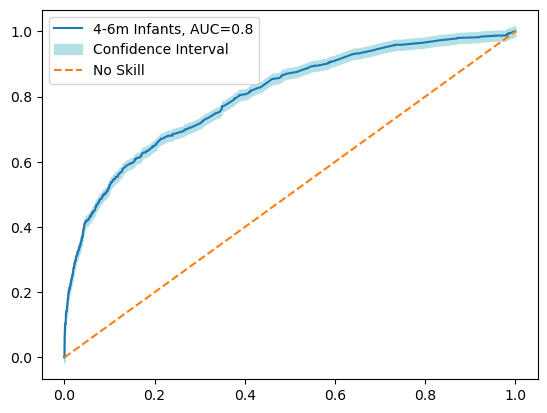

In [ ]:
# AUC
from matplotlib import pyplot as plt

y_pred_proba = model.predict(X)
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)


# AUC with CI

ci = 1.96 * np.std(tpr)/np.sqrt(len(fpr))

fig, ax = plt.subplots()
ax.plot (fpr,tpr)
ax.fill_between(fpr, (tpr-ci), (tpr+ci), color='powderblue', alpha=.95)
ax.plot([0,1], [0,1], linestyle='--')
ax.legend(["4-6m Infants, AUC="+str(round(auc,2)),"Confidence Interval","No Skill"])

In [ ]:
#Prenatal model result
rf = RandomForestRegressor(n_estimators=70, max_features='sqrt', max_depth=15, random_state=35)

rf.fit(D_train,c_train)
c_pred = (rf.predict(D_test) > 0.1).astype('float')

rf_matrix = confusion_matrix(c_test, c_pred)
print ("Prenatal model results")
print(rf_matrix)
print(classification_report(c_test, c_pred))
print("Accuracy:",metrics.accuracy_score(c_test, c_pred))
print("Precision:",metrics.precision_score(c_test, c_pred))
print("Recall:",metrics.recall_score(c_test, c_pred))
print("roc_auc_score:",roc_auc_score(c_test, rf.predict(D_test)))
print("roc_auc_score:",roc_auc_score(c_test, c_pred))

Prenatal model results
[[22911  5803]
 [  494   721]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     28714
           1       0.11      0.59      0.19      1215

    accuracy                           0.79     29929
   macro avg       0.54      0.70      0.53     29929
weighted avg       0.94      0.79      0.85     29929

Accuracy: 0.7896020582044171
Precision: 0.11051502145922747
Recall: 0.5934156378600823
roc_auc_score: 0.7632903294044201
roc_auc_score: 0.6956595497930349


Text(0.5, 1.0, 'Feature importance')

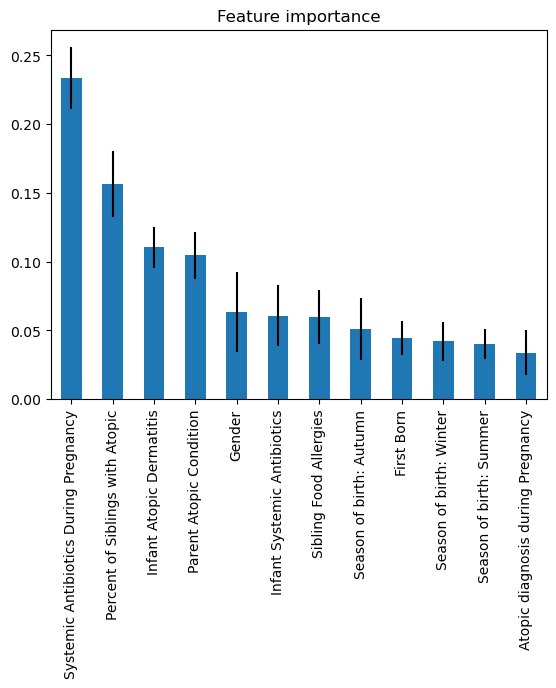

In [ ]:
model = rf
#model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

std = np.std([i.feature_importances_ for i in rf.estimators_], axis=0)

importances = rf.feature_importances_

feat_with_importance = pd.Series(importances, X.columns).nlargest(20)
fig, ax = plt.subplots()
feat_with_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance")

In [ ]:
#Atopic dermatitis model result

rf = RandomForestRegressor(n_estimators=70, max_features='sqrt', max_depth=15, random_state=35)

rf.fit(F_train,e_train)
e_pred = (rf.predict(F_test) > 0.1).astype('float')

rf_matrix = confusion_matrix(e_test, e_pred)
print ("AD model results")
print(rf_matrix)
print(classification_report(e_test, e_pred))
print("Accuracy:",metrics.accuracy_score(e_test, e_pred))
print("Precision:",metrics.precision_score(e_test, e_pred))
print("Recall:",metrics.recall_score(e_test, e_pred))
print("roc_auc_score:",roc_auc_score(e_test, rf.predict(F_test)))
print("roc_auc_score:",roc_auc_score(e_test, e_pred))

AD model results
[[28226   438]
 [ 1069   196]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     28664
           1       0.31      0.15      0.21      1265

    accuracy                           0.95     29929
   macro avg       0.64      0.57      0.59     29929
weighted avg       0.94      0.95      0.94     29929

Accuracy: 0.9496474990811588
Precision: 0.30914826498422715
Recall: 0.1549407114624506
roc_auc_score: 0.569830110126983
roc_auc_score: 0.569830110126983


In [ ]:
#Maternal FA model result

rf = RandomForestRegressor(n_estimators=70, max_features='sqrt', max_depth=15, random_state=35)

rf.fit(Z_train,e_train)
t_pred = (rf.predict(Z_test) > 0.1).astype('float')
#t_pred = (rf.predict(Z_test)>0.5).astype('float')


rf_matrix = confusion_matrix(t_test, t_pred)
print ("Maternal FA model results")
print(rf_matrix)
print(classification_report(t_test, t_pred))
print("Accuracy:",metrics.accuracy_score(t_test, t_pred))
print("Precision:",metrics.precision_score(t_test, t_pred))
print("Recall:",metrics.recall_score(t_test, t_pred))
print("roc_auc_score:",roc_auc_score(t_test, rf.predict(Z_test)))
print("roc_auc_score:",roc_auc_score(t_test, t_pred))

Maternal FA model results
[[24978  3691]
 [  934   326]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.92     28669
           1       0.08      0.26      0.12      1260

    accuracy                           0.85     29929
   macro avg       0.52      0.56      0.52     29929
weighted avg       0.93      0.85      0.88     29929

Accuracy: 0.8454676066691169
Precision: 0.08115509086382873
Recall: 0.25873015873015875
roc_auc_score: 0.564992412024049
roc_auc_score: 0.564992412024049


In [ ]:
#Parental Atopic model result

rf = RandomForestRegressor(n_estimators=70, max_features='sqrt', max_depth=15, random_state=35)

rf.fit(B_train,a_train)
a_pred = (rf.predict(B_test) > 0.1).astype('float')
#t_pred = (rf.predict(Z_test)>0.5).astype('float')


rf_matrix = confusion_matrix(a_test, a_pred)
print ("Atopic Parent model results")
print(rf_matrix)
print(classification_report(a_test, a_pred))
print("Accuracy:",metrics.accuracy_score(a_test, a_pred))
print("Precision:",metrics.precision_score(a_test, a_pred))
print("Recall:",metrics.recall_score(a_test, a_pred))
print("roc_auc_score:",roc_auc_score(a_test, rf.predict(B_test)))
print("roc_auc_score:",roc_auc_score(a_test, a_pred))

Atopic Parent model results
[[20259  8445]
 [  632   593]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     28704
           1       0.07      0.48      0.12      1225

    accuracy                           0.70     29929
   macro avg       0.52      0.59      0.47     29929
weighted avg       0.93      0.70      0.79     29929

Accuracy: 0.6967155601590431
Precision: 0.06561186103120159
Recall: 0.4840816326530612
roc_auc_score: 0.6024001490228199
roc_auc_score: 0.5949358832161628


Best Threshold=0.348197, F-Score=0.358


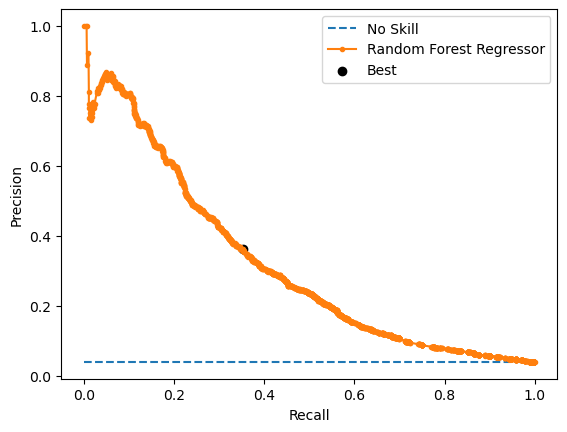

In [ ]:

# optimal threshold for precision-recall curve with logistic regression model
y_pred = (rf.predict(X_test)).astype('float')
#y_pred = logreg.predict_proba(X_test)[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest Regressor')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()


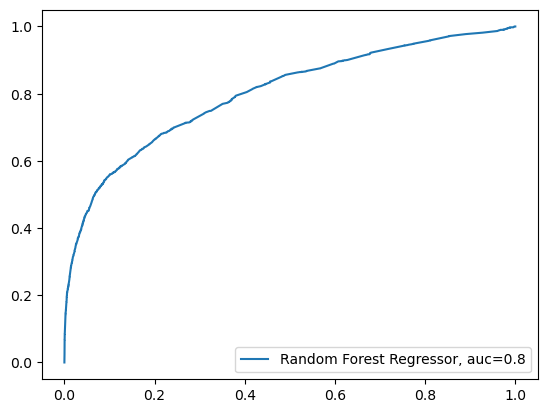

In [ ]:
# AUC
from matplotlib import pyplot as plt

y_pred_proba = rf.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Random Forest Regressor, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.show()

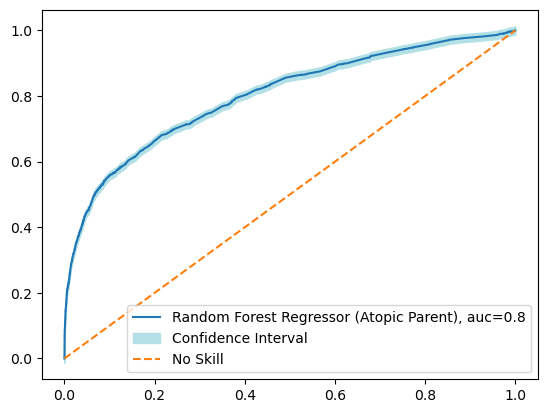

In [ ]:
# AUC with CI
x = fpr
y = tpr
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot (x,y)
ax.fill_between(x, (y-ci), (y+ci), color='powderblue', alpha=.95)
ax.plot([0,1], [0,1], linestyle='--')
ax.legend(["Random Forest Regressor (Atopic Parent), auc="+str(round(auc,2)),"Confidence Interval","No Skill"])

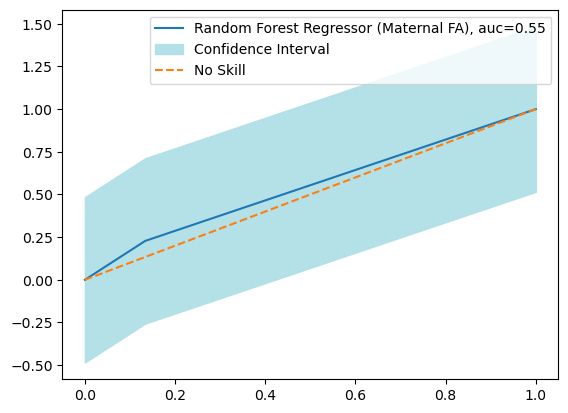

In [ ]:
# AUC with CI
x = fpr
y = tpr
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot (x,y)
ax.fill_between(x, (y-ci), (y+ci), color='powderblue', alpha=.95)
ax.plot([0,1], [0,1], linestyle='--')
ax.legend(["Random Forest Regressor (Maternal FA), auc="+str(round(auc,2)),"Confidence Interval","No Skill"])

#### One AUC graph for all

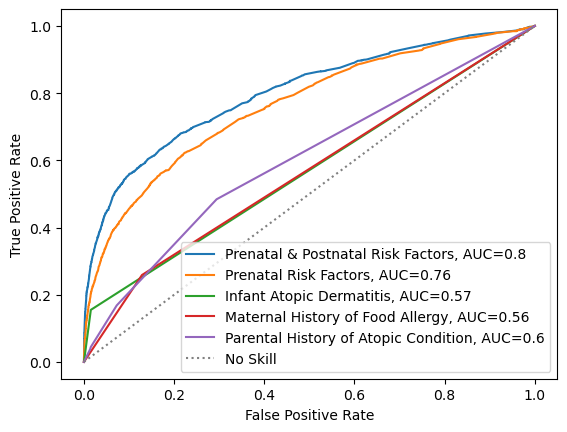

In [ ]:
plt.figure(0).clf()

rf = RandomForestRegressor(n_estimators=70, max_features='sqrt', max_depth=15, random_state=35)
rf2 = RandomForestRegressor(n_estimators=70, max_features='sqrt', max_depth=15, random_state=35)
rf3 = RandomForestRegressor(n_estimators=70, max_features='sqrt', max_depth=15, random_state=35)
rf4 = RandomForestRegressor(n_estimators=70, max_features='sqrt', max_depth=15, random_state=35)
rf5 = RandomForestRegressor(n_estimators=70, max_features='sqrt', max_depth=15, random_state=35)


rf.fit(X_train,y_train)
y_pred_proba = rf.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Prenatal & Postnatal Risk Factors, AUC="+str(round(auc,2)))


rf4.fit(D_train,c_train)
c_pred_proba = rf4.predict(D_test)
fpr4, tpr4, _ = metrics.roc_curve(c_test,  c_pred_proba)
auc4 = metrics.roc_auc_score(c_test, c_pred_proba)
plt.plot(fpr4,tpr4,label="Prenatal Risk Factors, AUC="+str(round(auc4,2)), linestyle='solid')


rf5.fit(F_train,e_train)
e_pred_proba = rf5.predict(F_test)
fpr5, tpr5, _ = metrics.roc_curve(e_test,  e_pred_proba)
auc5 = metrics.roc_auc_score(e_test, e_pred_proba)
plt.plot(fpr5,tpr5,label="Infant Atopic Dermatitis, AUC="+str(round(auc5,2)), linestyle='solid')


rf2.fit(Z_train,t_train)
t_pred_proba = rf2.predict(Z_test)
fpr2, tpr2, _ = metrics.roc_curve(t_test,  t_pred_proba)
auc2 = metrics.roc_auc_score(t_test, t_pred_proba)
plt.plot(fpr2,tpr2,label="Maternal History of Food Allergy, AUC="+str(round(auc2,2)), linestyle='solid')


rf3.fit(B_train,a_train)
a_pred_proba = rf3.predict(B_test)
fpr3, tpr3, _ = metrics.roc_curve(a_test,  a_pred_proba)
auc3 = metrics.roc_auc_score(a_test, a_pred_proba)
plt.plot(fpr3,tpr3,label="Parental History of Atopic Condition, AUC="+str(round(auc3,2)), linestyle='solid')

plt.plot([0,1], [0,1], linestyle='dotted', color="grey", label="No Skill")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=4)


In [ ]:
# Prenatal
# Atopic Dermatitis